# 1. Importing Required Packages

In [0]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 2. Reading the Dataset

In [43]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
avocado_df_backup = pd.read_csv('/content/gdrive/My Drive/Colab Upload Files/Fbprophet Coursera/avocado.csv')
avocado_df = avocado_df_backup.copy()

# 3. Descriptive Information about the dataset

### 3.1. Column Descriptions

- **Date**: The date of the observation
- **AveragePrice**: the average price of a single avocado
- **type**: conventional or organic
- **year**: the year
- **Region**: the city or region of the observation
- **Total Volume**: Total number of avocados sold
- **4046**: Total number of avocados with PLU 4046 sold
- **4225**: Total number of avocados with PLU 4225 sold
- **4770**: Total number of avocados with PLU 4770 sold

### 3.2. First few rows...

In [45]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 3.3. Number of null values for each column

In [46]:
avocado_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### 3.4. Data Type of ech Column

In [47]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### 3.5. Statistical Description of all Numeric Columns

In [48]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# 4. Data Exploration

### 4.1. Sorting Data by 'Date' Column

In [0]:
avocado_df = avocado_df.sort_values('Date')

### 4.2. Line Plot: AveragePrice-vs-Date 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


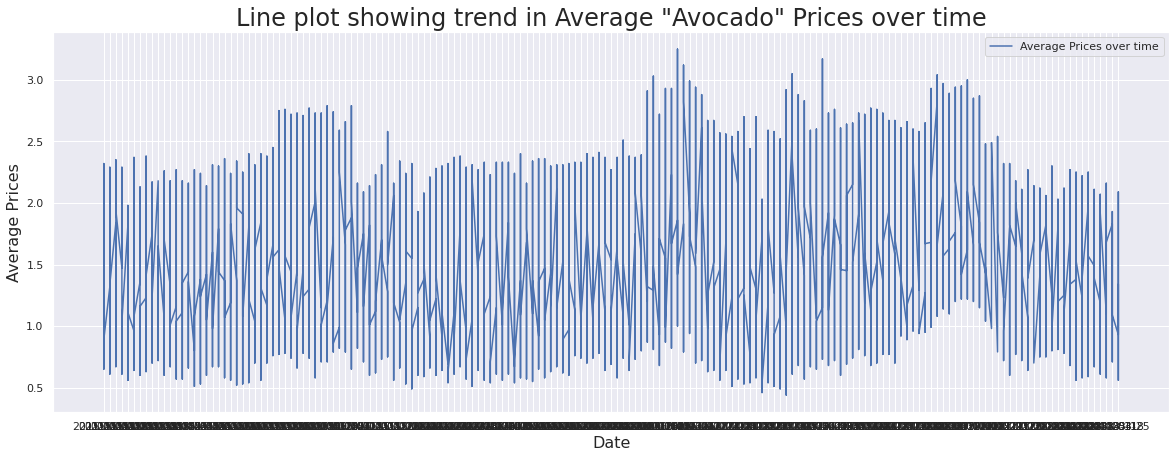

In [50]:
plt.figure(figsize= (20, 7))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'], color='b', label='Average Prices over time')

plt.title('Line plot showing trend in Average "Avocado" Prices over time', size=24)
plt.xlabel('Date', size=16)
plt.ylabel('Average Prices', size=16)

plt.legend()
plt.show()

### 4.3. Distribution/Density Plot: "AveragePrice" Column

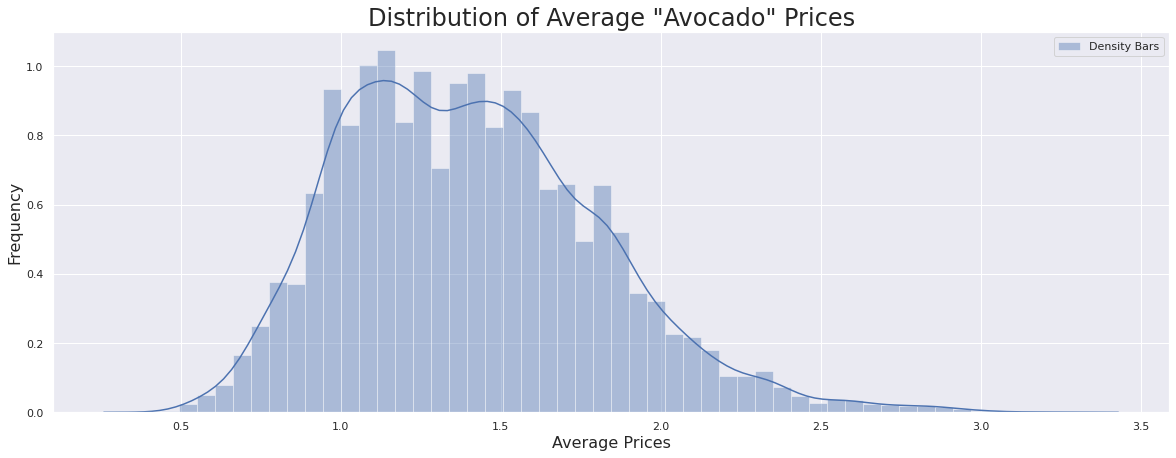

In [51]:
plt.figure(figsize= (20, 7))

sns.distplot(avocado_df['AveragePrice'], color='b', label='Density Bars')

plt.title('Distribution of Average "Avocado" Prices', size=24)
plt.xlabel('Average Prices', size=16)
plt.ylabel('Frequency', size=16)

plt.legend()
plt.show()

### 4.4. Violin Plot: AveragePrice-vs-type

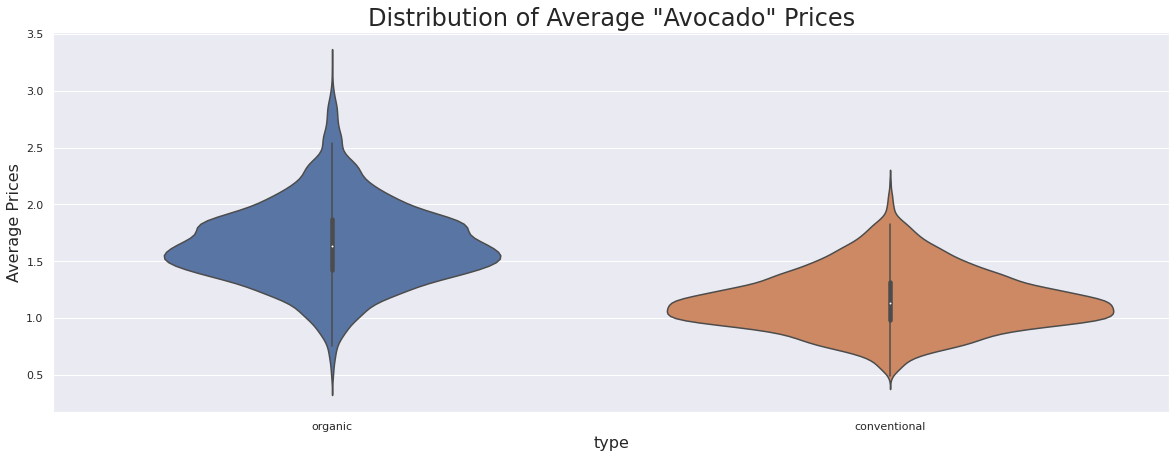

In [52]:
plt.figure(figsize= (20, 7))

sns.violinplot(x='type', y='AveragePrice', data=avocado_df)

plt.title('Distribution of Average "Avocado" Prices', size=24)
plt.xlabel('type', size=16)
plt.ylabel('Average Prices', size=16)

plt.show()

### 4.5. Bar Chart: Distribution of Data over the Regions

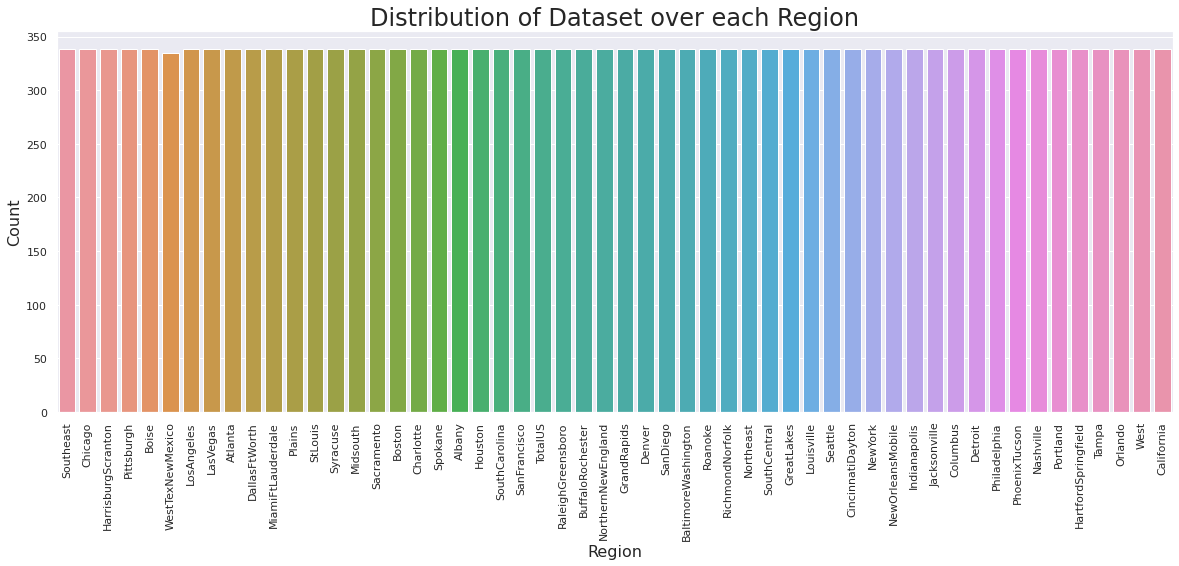

In [53]:
plt.figure(figsize= (20, 7))

sns.countplot(x='region', data=avocado_df)

plt.title('Distribution of Dataset over each Region', size=24)
plt.xlabel('Region', size=16)
plt.ylabel('Count', size=16)

plt.xticks(rotation=90)

plt.show()

### 4.6. Bar Chart: Distribution of Data over the years.

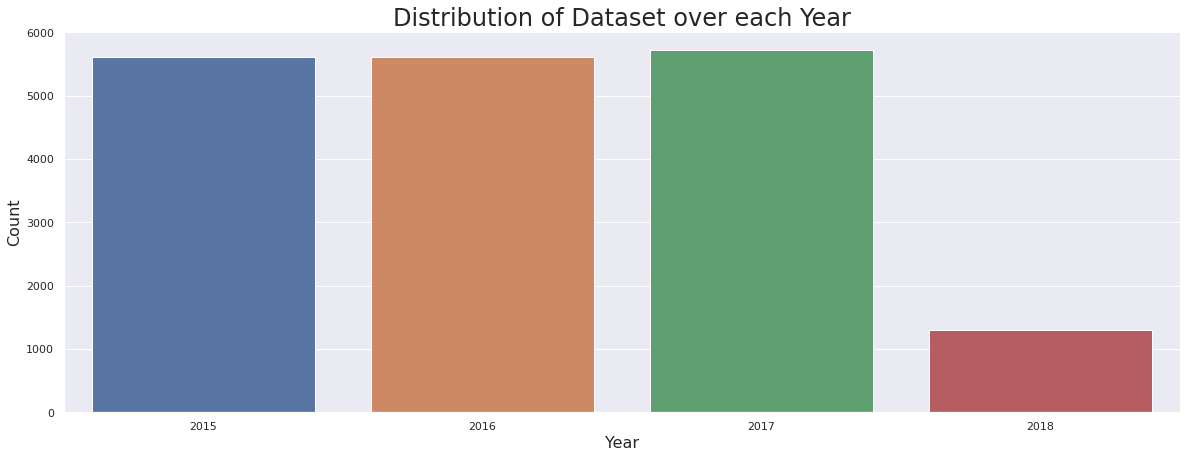

In [54]:
plt.figure(figsize= (20, 7))

sns.countplot(x='year', data=avocado_df)

plt.title('Distribution of Dataset over each Year', size=24)
plt.xlabel('Year', size=16)
plt.ylabel('Count', size=16)

plt.xticks(rotation=0)

plt.show()

### 4.7. Catplot: region-vs-AveragePrice (of 'conventional' Avocado)

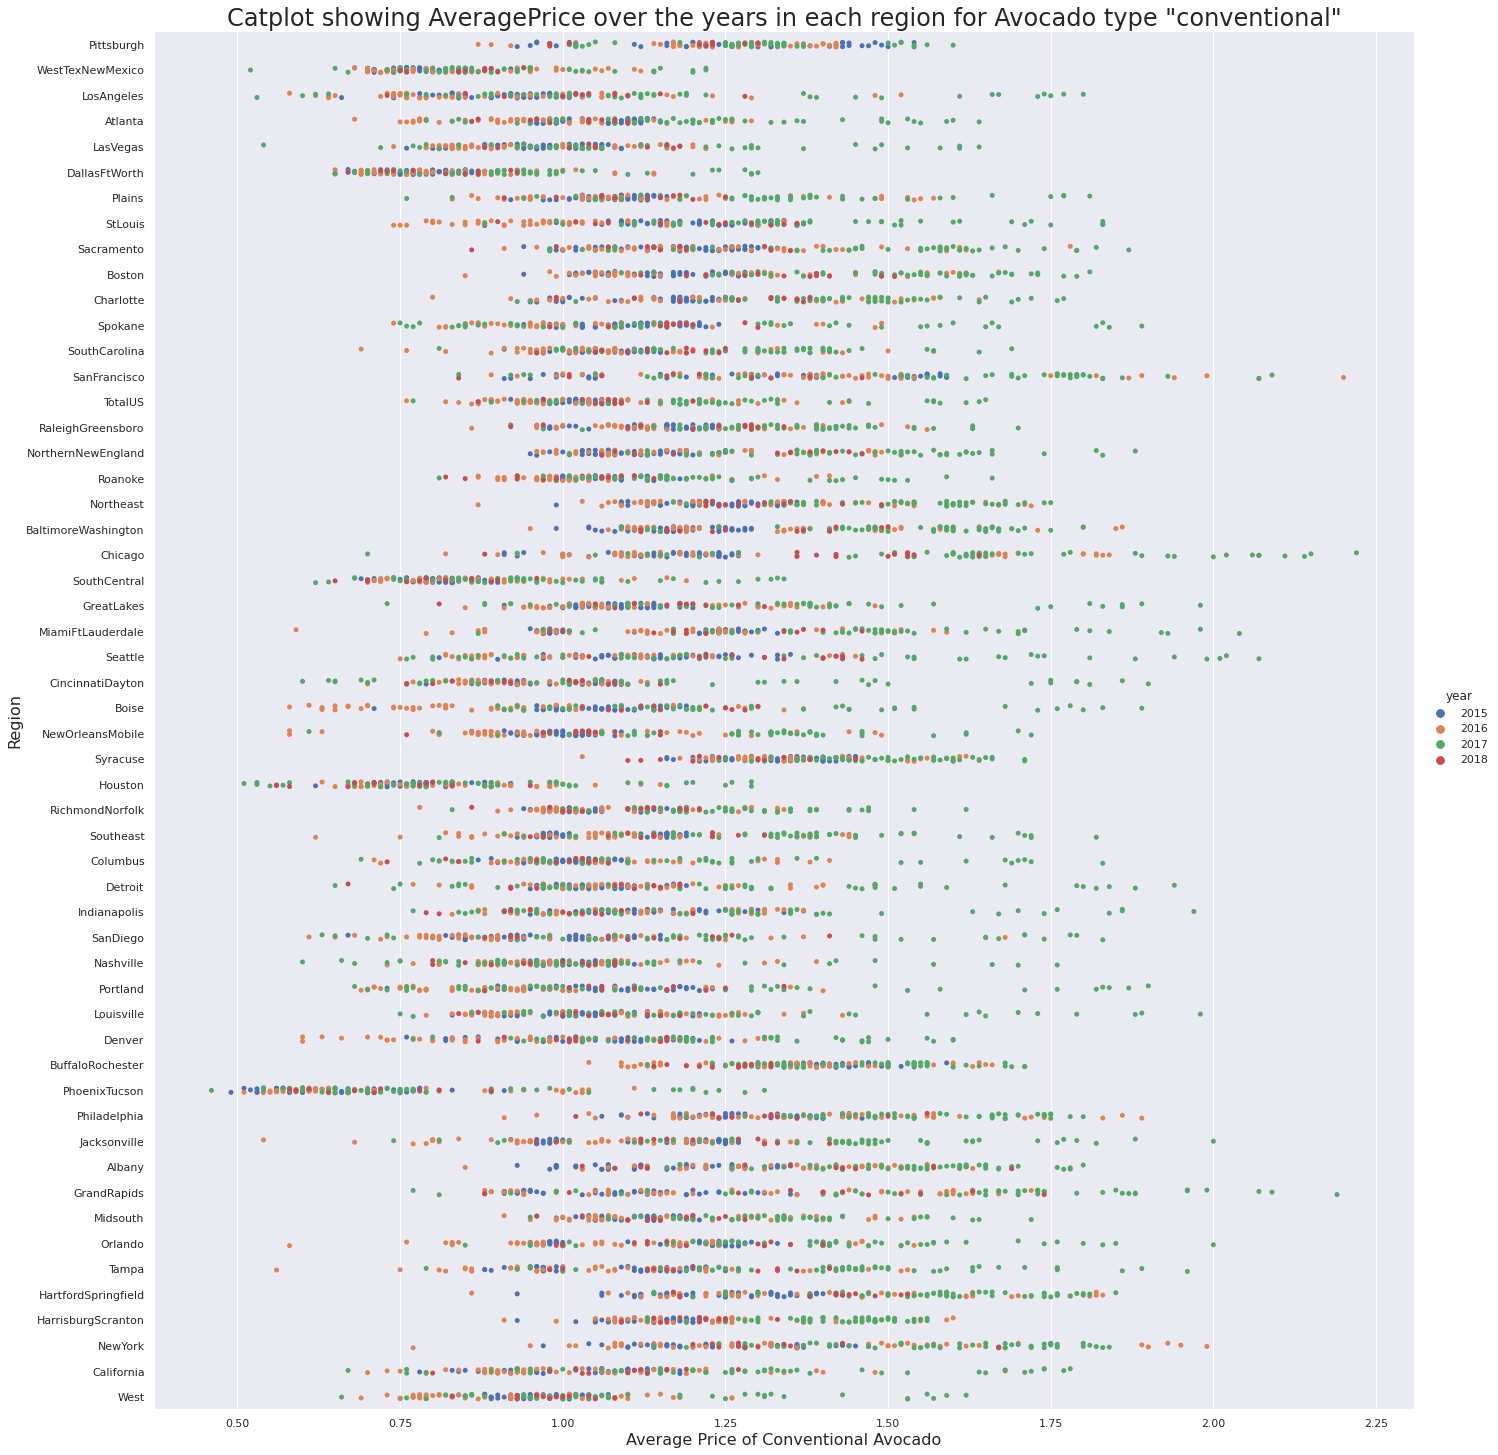

In [55]:
conventional = sns.catplot('AveragePrice', 'region', data=avocado_df[avocado_df['type'] == 'conventional'], hue='year', height=20)

plt.title('Catplot showing AveragePrice over the years in each region for Avocado type "conventional"', size=24)
plt.xlabel('Average Price of Conventional Avocado', size=16)
plt.ylabel('Region', size=16)

plt.show()

### 4.8. Catplot: region-vs-AveragePrice (of 'organic' Avocado)

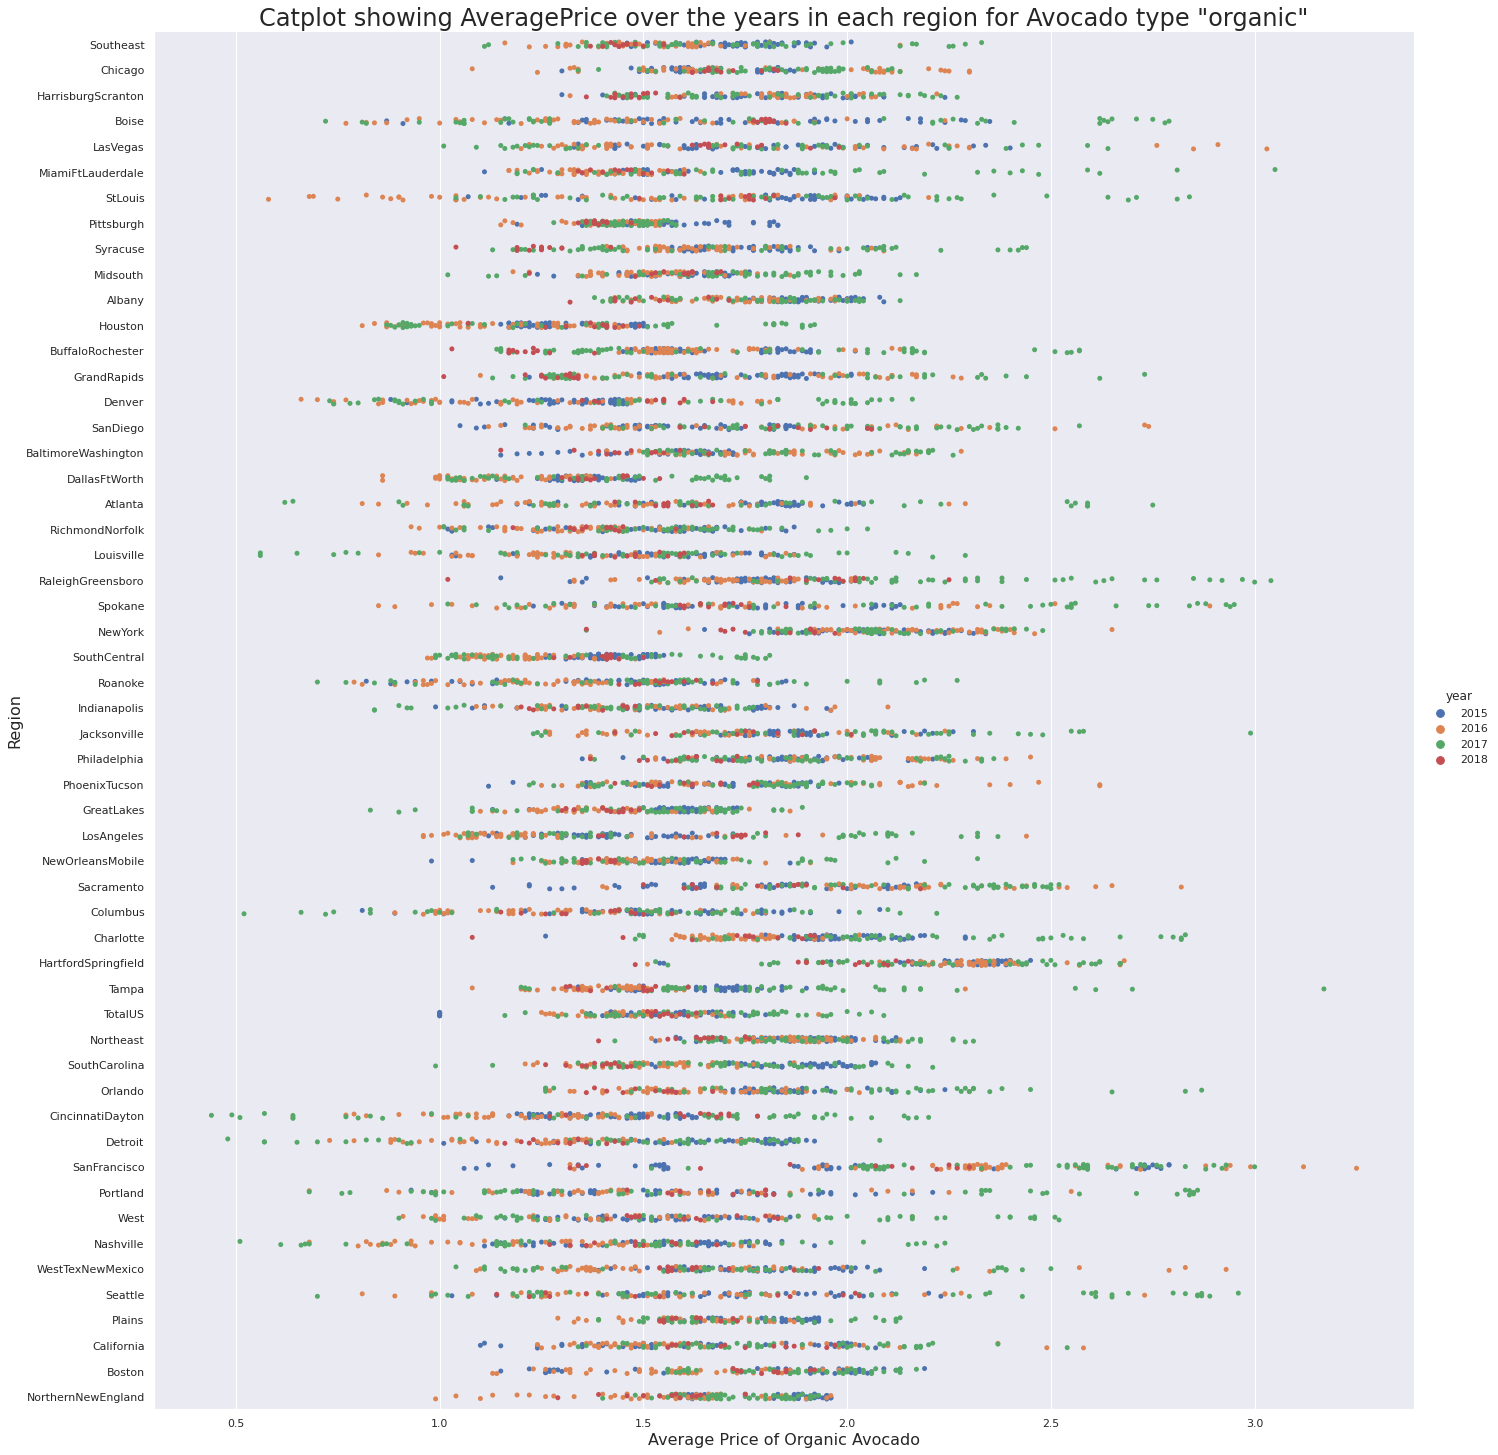

In [56]:
organic = sns.catplot('AveragePrice', 'region', data=avocado_df[avocado_df['type'] == 'organic'], hue='year', height=20)

plt.title('Catplot showing AveragePrice over the years in each region for Avocado type "organic"', size=24)
plt.xlabel('Average Price of Organic Avocado', size=16)
plt.ylabel('Region', size=16)

plt.show()

# 5. Prepare Data for Facebook Prophet tool

### 5.1. Extracting only the 'Date' and 'AveragePrice' Columns

In [0]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

### 5.2. Renaming the columns according to Facebook Prophet Conventions

In [0]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

# 6. Develop Model and make Predictions

### 6.1. Instantiate Facebook Prophet Model and fit it to our data

In [59]:
model = Prophet()
model.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 6.2. Use the trained model to predict 365 days (1 year) into the future


In [0]:
future_df = model.make_future_dataframe(periods=365)
forecast_df = model.predict(future_df)

### 6.3. Looking at first few rows of the model predictions...

In [63]:
forecast_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496497,0.886570,1.889019,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
1,2015-01-04,1.496497,0.890850,1.860079,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
2,2015-01-04,1.496497,0.892863,1.876460,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
3,2015-01-04,1.496497,0.933998,1.854773,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
4,2015-01-04,1.496497,0.914735,1.815390,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903


### 6.4. Line Plot of Trend predicted

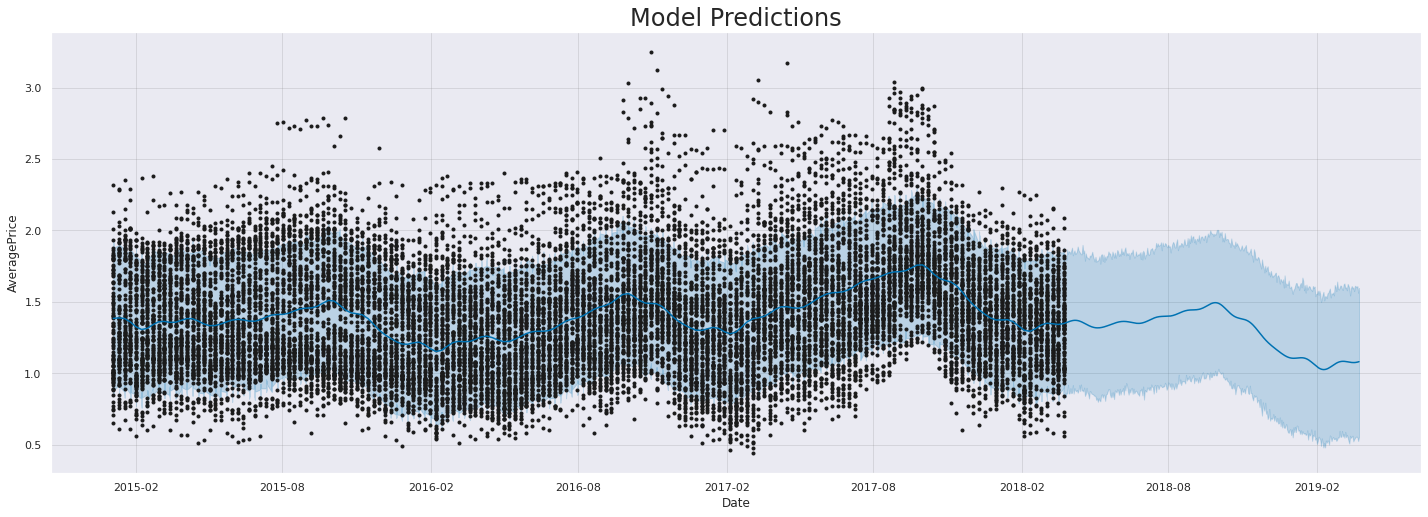

In [67]:
fig = model.plot(forecast_df, xlabel='Date', ylabel='AveragePrice', figsize = (20, 7))

plt.title('Model Predictions', size=24)
plt.show()

### 6.5. Plotting Components - Overall Trend and Yearly Trend

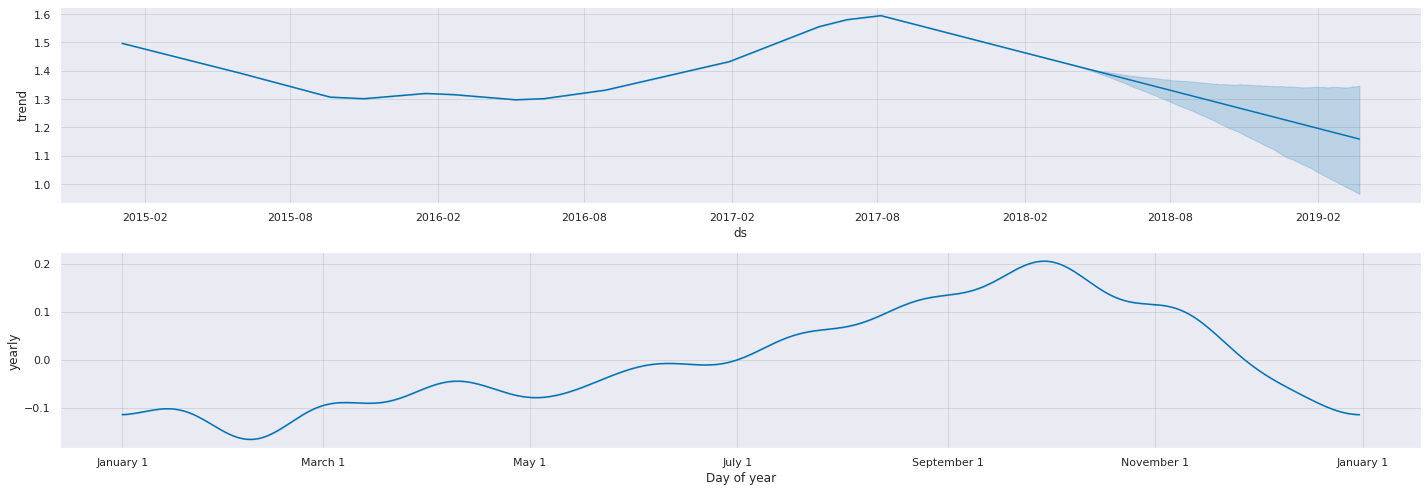

In [70]:
fig2 = model.plot_components(forecast_df, figsize=(20, 7))

# 7. Make a similar model for a specific region ('West' in this case)

### 7.1. Reading and Extracting the required segment of the dataset

In [0]:
avocado_west_df_backup = avocado_df[avocado_df['region'] == 'West']
avocado_west_df = avocado_west_df_backup.copy()

### 7.2. Sorting and Preparing the Data for Facebook Prophet Model 

In [0]:
avocado_west_df = avocado_west_df.sort_values('Date')
avocado_west_prophet_df = avocado_west_df[['Date', 'AveragePrice']]
avocado_west_prophet_df = avocado_west_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

### 7.3. Instantiating and Training the Model

In [75]:
model_west = Prophet()
model_west.fit(avocado_west_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 7.4. Predictions for the next 365 days (1 year)

In [0]:
future_df_west = model_west.make_future_dataframe(periods=365)
forecast_df_west = model_west.predict(future_df_west)

### 7.5. Line plot of trend predicted for West Region

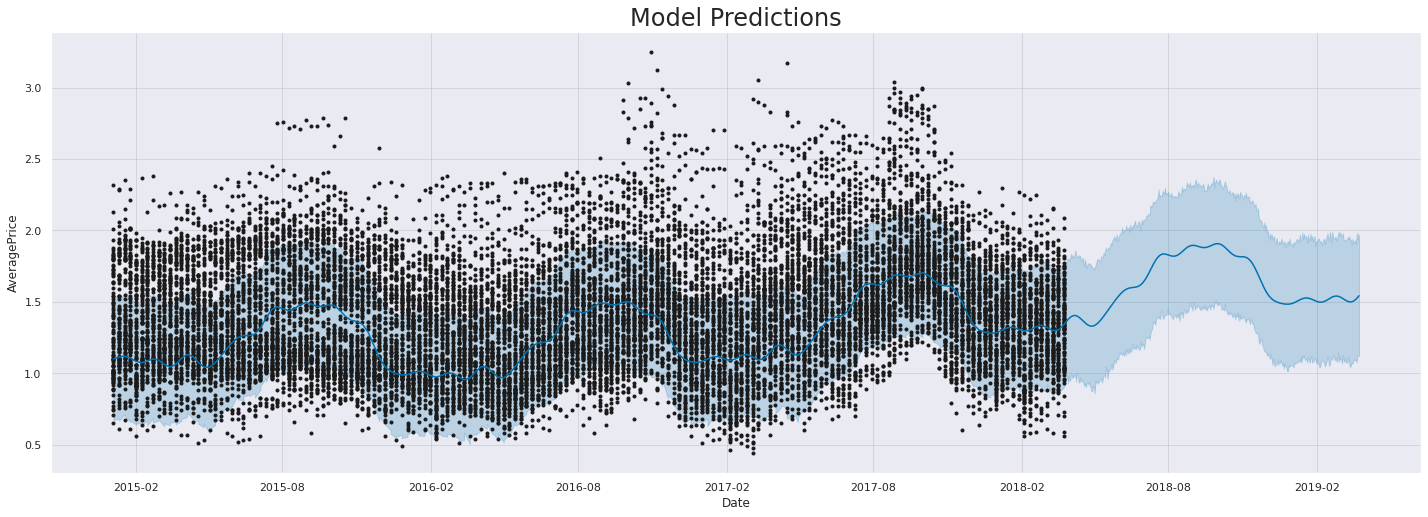

In [79]:
fig = model.plot(forecast_df_west, xlabel='Date', ylabel='AveragePrice', figsize = (20, 7))

plt.title('Model Predictions', size=24)
plt.show()

### 7.6. Plotting Components - Overall Trend and Yearly Trend for West Region

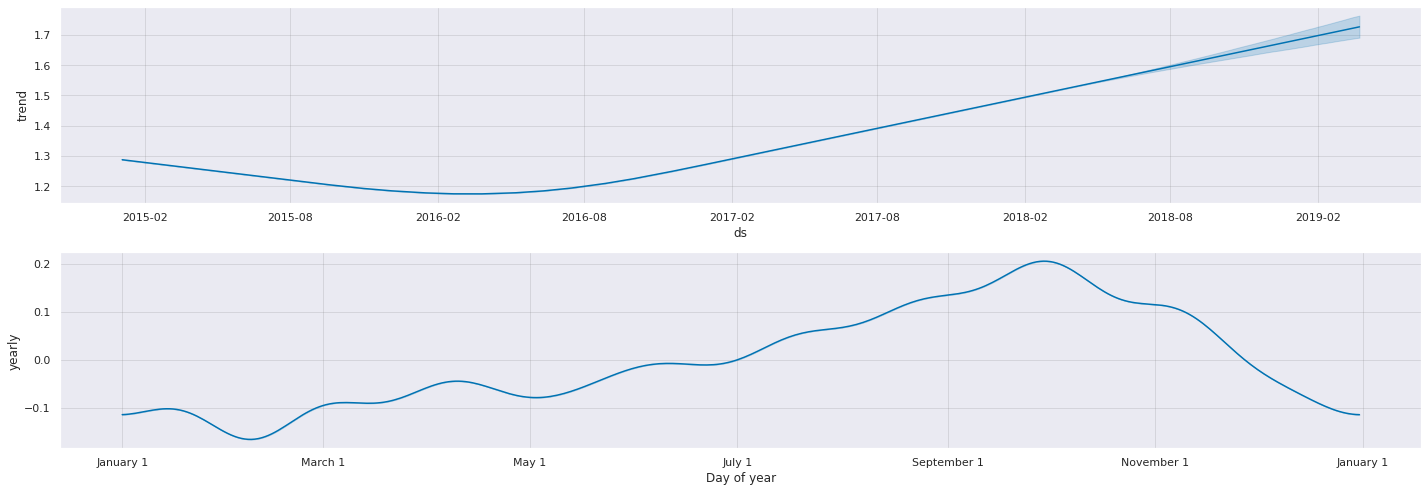

In [80]:
fig2 = model.plot_components(forecast_df_west, figsize=(20, 7))